In [1]:
%load_ext autoreload
%aimport utils
%autoreload 1

# Introduction to Keras and TensorFlow

## First steps with TensorFlow

#### Constant tensors and variables

**Listing 3.1: All-ones or all-zeros tensors**

In [2]:
import tensorflow as tf
import numpy as np
import torch
x_tf = tf.ones(shape=(2, 1))
x_np = np.ones(shape=(2, 1))
x_pt = torch.ones(size=(2, 1))
utils.tensor_info(x_tf, "TensorFlow ones")
utils.tensor_info(x_np, "Numpy ones")
utils.tensor_info(x_pt, "PyTorch ones")

==================== TensorFlow ones | tensor_info ====================
Type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: (2, 1) | nDims: 2 | dtype: <dtype: 'float32'>
Content: [[1.]
 [1.]]

==================== Numpy ones | tensor_info ====================
Type: <class 'numpy.ndarray'>
Shape: (2, 1) | nDims: 2 | dtype: float64
Content: [[1.]
 [1.]]

==================== PyTorch ones | tensor_info ====================
Type: <class 'torch.Tensor'>
Shape: torch.Size([2, 1]) | nDims: 2 | dtype: torch.float32
Content: tensor([[1.],
        [1.]])



In [3]:
x_tf = tf.zeros(shape=(2, 1))
x_np = np.zeros(shape=(2, 1))
x_pt = torch.zeros(size=(2, 1))
utils.tensor_info(x_tf, "TensorFlow zeros")
utils.tensor_info(x_np, "Numpy zeros")
utils.tensor_info(x_pt, "PyTorch zeros")


==================== TensorFlow zeros | tensor_info ====================
Type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: (2, 1) | nDims: 2 | dtype: <dtype: 'float32'>
Content: [[0.]
 [0.]]

==================== Numpy zeros | tensor_info ====================
Type: <class 'numpy.ndarray'>
Shape: (2, 1) | nDims: 2 | dtype: float64
Content: [[0.]
 [0.]]

==================== PyTorch zeros | tensor_info ====================
Type: <class 'torch.Tensor'>
Shape: torch.Size([2, 1]) | nDims: 2 | dtype: torch.float32
Content: tensor([[0.],
        [0.]])



**Listing 3.2: Random tensors**

In [4]:
# Random normal follow normal distribution with mean 0 and standard deviation 1
x_tf = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
x_np = np.random.normal(loc=0., scale=1., size=(3, 1))
x_pt = torch.randn(size=(3, 1))
utils.tensor_info(x_tf, "TensorFlow random normal")
utils.tensor_info(x_np, "Numpy random normal")
utils.tensor_info(x_pt, "PyTorch random normal")


==================== TensorFlow random normal | tensor_info ====================
Type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: (3, 1) | nDims: 2 | dtype: <dtype: 'float32'>
Content: [[ 2.6338775]
 [-0.690028 ]
 [ 1.4769406]]

==================== Numpy random normal | tensor_info ====================
Type: <class 'numpy.ndarray'>
Shape: (3, 1) | nDims: 2 | dtype: float64
Content: [[-0.53551005]
 [-1.14342284]
 [ 2.05578632]]

==================== PyTorch random normal | tensor_info ====================
Type: <class 'torch.Tensor'>
Shape: torch.Size([3, 1]) | nDims: 2 | dtype: torch.float32
Content: tensor([[-0.5274],
        [ 0.8974],
        [-1.0656]])



In [5]:
# Random uniform follow a uniform distribution between 0 and 1
x_tf = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
x_np = np.random.uniform(low=0., high=1., size=(3, 1))
x_pt = torch.rand(size=(3, 1))
utils.tensor_info(x_tf, "TensorFlow random uniform")
utils.tensor_info(x_np, "Numpy random uniform")
utils.tensor_info(x_pt, "PyTorch random uniform")


==================== TensorFlow random uniform | tensor_info ====================
Type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: (3, 1) | nDims: 2 | dtype: <dtype: 'float32'>
Content: [[0.07838023]
 [0.79042006]
 [0.04327762]]

==================== Numpy random uniform | tensor_info ====================
Type: <class 'numpy.ndarray'>
Shape: (3, 1) | nDims: 2 | dtype: float64
Content: [[0.43979629]
 [0.90247727]
 [0.64440854]]

==================== PyTorch random uniform | tensor_info ====================
Type: <class 'torch.Tensor'>
Shape: torch.Size([3, 1]) | nDims: 2 | dtype: torch.float32
Content: tensor([[0.6764],
        [0.4564],
        [0.0333]])



**Listing 3.3: NumPy arrays are assignable**

==================== x | tensor_info ====================
Type: <class 'numpy.ndarray'>
Shape: (2, 2) | nDims: 2 | dtype: float64
x[0]: [0. 1.]


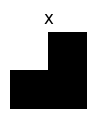

In [6]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
utils.tensor_info(x, "x")


**Listing 3.4: TensorFlow tensors are not assignable**

Error: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

==================== x | tensor_info ====================
Type: <class 'torch.Tensor'>
Shape: torch.Size([2, 2]) | nDims: 2 | dtype: torch.float32
x[0]: tensor([0., 1.])


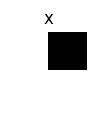

In [7]:
x = tf.zeros(shape=(2, 2))
try:
    x[0, 0] = 1.
except Exception as e:
    print(f"Error: {e}\n")
# They are mutable in PyTorch tho
x = torch.tensor(x.numpy())
x[0, 1] = 1
utils.tensor_info(x, "x")

**Listing 3.5: Creating a TensorFlow variable**

In [8]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
utils.tensor_info(v, "TensorFlow variable")
# Since PyTorch v0.4.0 Tensor and Variable are merged, so there is no such thing as a 
# PyTorch variable.

==================== TensorFlow variable | tensor_info ====================
Type: <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
Shape: (3, 1) | dtype: <dtype: 'float32'>
Content: [[-0.28510958]
 [ 0.08405797]
 [ 0.94775605]]



**Listing 3.6: Assigning a value to a TensorFlow variable**

In [9]:
v.assign(tf.ones((3, 1)))
utils.tensor_info(v, "TensorFlow variable")

==================== TensorFlow variable | tensor_info ====================
Type: <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
Shape: (3, 1) | dtype: <dtype: 'float32'>
Content: [[1.]
 [1.]
 [1.]]



**Listing 3.7: Assigning a value to a subset of a TensorFlow variable**

In [10]:
v[0, 0].assign(3.)
utils.tensor_info(v, "TensorFlow variable")

==================== TensorFlow variable | tensor_info ====================
Type: <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
Shape: (3, 1) | dtype: <dtype: 'float32'>
Content: [[3.]
 [1.]
 [1.]]



**Listing 3.8: Using `assign_add`**

In [11]:
v.assign_add(tf.ones((3, 1)))
utils.tensor_info(v, "TensorFlow variable")
# In PyTorch:
v = torch.tensor(v.numpy())
v += torch.ones((3, 1))
utils.tensor_info(v, "PyTorch variable")

==================== TensorFlow variable | tensor_info ====================
Type: <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
Shape: (3, 1) | dtype: <dtype: 'float32'>
Content: [[4.]
 [2.]
 [2.]]

==================== PyTorch variable | tensor_info ====================
Type: <class 'torch.Tensor'>
Shape: torch.Size([3, 1]) | nDims: 2 | dtype: torch.float32
Content: tensor([[5.],
        [3.],
        [3.]])



#### Tensor operations: Doing math in TensorFlow

**Listing 3.9: A few basic math operations**

In [12]:
# I will stop here the numpy examples, it is pretty clear at this time.
# Also, TensorFlow and PyTorch are functionally the same for this operations.
# That's easy!
a_tf = tf.ones((2, 2))
a_torch = torch.ones((2, 2))
# Squares
b_tf = tf.square(a_tf)
b_torch = torch.square(a_torch)
# Square root
c_tf = tf.sqrt(a_tf)
c_torch = tf.sqrt(a_torch)
# Element-wise addition
d_tf = b_tf + c_tf
d_torch = b_torch + c_torch
# Matrix multiplication
e_tf = tf.matmul(a_torch, b_torch)
e_torch = torch.matmul(a_torch, b_torch)
# Element-wise multiplication
e_tf *= d_tf
e_torch *= d_torch

utils.tensor_info(e_tf, "e_tf", image=False)
utils.tensor_info(e_torch, "e_torch", image=False)

==================== e_tf | tensor_info ====================
Type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: (2, 2) | nDims: 2 | dtype: <dtype: 'float32'>
e_tf[0]: [4. 4.]

==================== e_torch | tensor_info ====================
Type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: (2, 2) | nDims: 2 | dtype: <dtype: 'float32'>
e_torch[0]: [4. 4.]



#### A second look at the GradientTape API

**Listing 3.10: Using the `GradientTape`**

In [13]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
utils.tensor_info(gradient, "gradient")

==================== gradient | tensor_info ====================
Type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: () | nDims: 0 | dtype: <dtype: 'float32'>
Content: 6.0



In [14]:
input_var = torch.tensor(3., requires_grad=True) # tell PyTorch to track the gradient
result = torch.square(input_var)
result.backward()
utils.tensor_info(input_var, "input_var and gradient")
# The gradient is stored in the input_var.grad attribute
# My function tensor_info automatically shows the gradient if it is available
print(result.grad_fn)

==================== input_var and gradient | tensor_info ====================
Type: <class 'torch.Tensor'>
Shape: torch.Size([]) | nDims: 0 | dtype: torch.float32
Content: 3.0
-- Gradient:
Type: <class 'torch.Tensor'>
Shape: torch.Size([]) | nDims: 0 | dtype: torch.float32
Content: 6.0




**Listing 3.11: Using `GradientTape` with constant tensor inputs**

In [15]:
# Not super common to compute the gradient of a constant, but it is possible
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
utils.tensor_info(gradient, "gradient")

==================== gradient | tensor_info ====================
Type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: () | nDims: 0 | dtype: <dtype: 'float32'>
Content: 6.0



**Listing 3.12: Using nested gradient tapes to compute second-order gradients**

In [16]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2 - 3 * time
    speed = inner_tape.gradient(position, time)
    utils.tensor_info(speed, "speed")
acceleration = outer_tape.gradient(speed, time)
utils.tensor_info(acceleration, "acceleration")

==================== speed | tensor_info ====================
Type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: () | nDims: 0 | dtype: <dtype: 'float32'>
Content: -3.0

==================== acceleration | tensor_info ====================
Type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: () | nDims: 0 | dtype: <dtype: 'float32'>
Content: 9.800000190734863



In [17]:
# Big TODO: Find a way to provide interesting information about this in tensor_info
time = torch.tensor(0., requires_grad=True)
position = 4.9 * time ** 2 - 3 * time
# Using backward for higher order derivatives is discouraged!
# This is a different approach more similar to the TensorFlow case.
# Instead of using backward, we use autograd.grad. which computes the gradient 
# and keeps the computation graph. Then, we can use autograd.grad again to compute
# the gradient of the gradient.
speed = torch.autograd.grad(position, time, create_graph=True)[0]
acceleration = torch.autograd.grad(speed, time)[0]
utils.tensor_info(speed, "speed")
utils.tensor_info(acceleration, "acceleration")
# This throws a warning because my tensor_info function is not prepared to handle
# gradients generated with torch.autograd.grad. I will fix this later.

==================== speed | tensor_info ====================
Type: <class 'torch.Tensor'>
Shape: torch.Size([]) | nDims: 0 | dtype: torch.float32
Content: -3.0

==================== acceleration | tensor_info ====================
Type: <class 'torch.Tensor'>
Shape: torch.Size([]) | nDims: 0 | dtype: torch.float32
Content: 9.800000190734863



/Users/alemalvarez/code-workspace/dl-with-python-pytorch/utils.py:58: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  if(tensor.requires_grad and tensor.grad is not None):


#### An end-to-end example: A linear classifier in pure TensorFlow

**Listing 3.13: Generating two classes of random points in a 2D plane**

In [18]:
# I have nothing to say about this code! Could have used scikit tho...
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Listing 3.14: Stacking the two classes into an array with shape (2000, 2)**

In [19]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Listing 3.15: Generating the corresponding targets (0 and 1)**

In [20]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Listing 3.16: Plotting the two point classes**

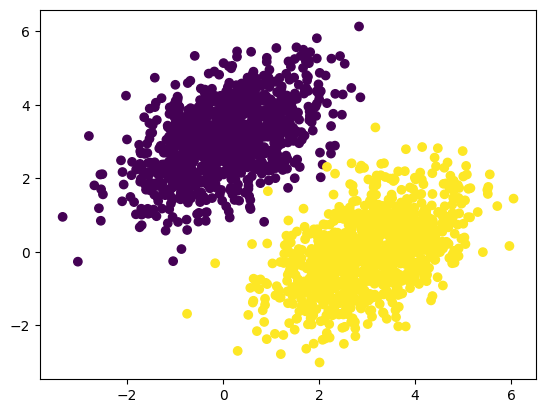

In [21]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

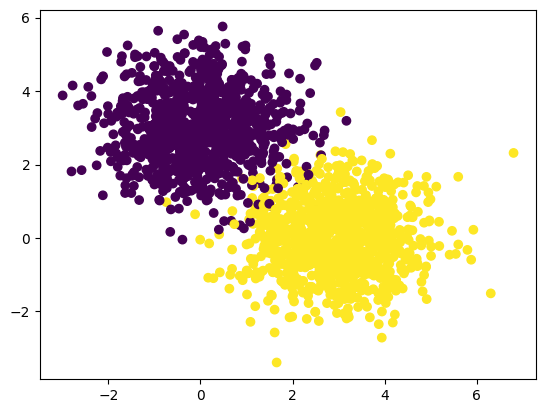

In [22]:
# Scikit version:
from sklearn.datasets import make_blobs
import numpy as np
num_samples_per_class = 1000
X, y = make_blobs(
    n_samples=[num_samples_per_class, num_samples_per_class],
    centers=[[0, 3], [3, 0]],
    cluster_std=[1.0, 1.0],
    random_state=0
)
# I think that make_blobs doesn't make non-diagonal covariance matrices... Fair enough
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

**Listing 3.17: Creating the linear classifier variables**

In [23]:
input_dim = 2
output_dim = 1
W_tf = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b_tf = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
utils.tensor_info(W_tf, "TensorFlow weights")
utils.tensor_info(b_tf, "TensorFlow bias")

W_torch = torch.rand(input_dim, output_dim, requires_grad=True)
b_torch = torch.zeros(output_dim, requires_grad=True)

utils.tensor_info(W_torch, "PyTorch weights")
utils.tensor_info(b_torch, "PyTorch bias")

==================== TensorFlow weights | tensor_info ====================
Type: <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
Shape: (2, 1) | dtype: <dtype: 'float32'>
Content: [[0.37057018]
 [0.5196552 ]]

==================== TensorFlow bias | tensor_info ====================
Type: <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
Shape: (1,) | dtype: <dtype: 'float32'>
Content: [0.]

==================== PyTorch weights | tensor_info ====================
Type: <class 'torch.Tensor'>
Shape: torch.Size([2, 1]) | nDims: 2 | dtype: torch.float32
Content: tensor([[0.0577],
        [0.4858]], grad_fn=<SliceBackward0>)

==================== PyTorch bias | tensor_info ====================
Type: <class 'torch.Tensor'>
Shape: torch.Size([1]) | nDims: 1 | dtype: torch.float32
Content: tensor([0.], grad_fn=<SliceBackward0>)



**Listing 3.18: The forward pass function**

In [24]:
# Pretty much the same here
def model_tf(inputs):
    return tf.matmul(inputs, W_tf) + b_tf

def model_torch(inputs):
    return torch.matmul(inputs, W_torch) + b_torch
    

**Listing 3.19: The mean squared error loss function**

In [25]:
# This are also almost the same
def square_loss_tf(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

def square_loss_torch(targets, predictions):
    per_sample_losses = torch.square(targets - predictions)
    return torch.mean(per_sample_losses)

**Listing 3.20: The training step function**

In [26]:
learning_rate = 0.1

def training_step_tf(inputs, targets):
    with tf.GradientTape() as tape: # Start recording the operations
        predictions = model_tf(inputs) # Forward pass
        loss = square_loss_tf(targets, predictions) # Compute the loss
    # Compute the gradient of the loss with respect to the weights and bias
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W_tf, b_tf])
    
    W_tf.assign_sub(grad_loss_wrt_W * learning_rate) # Update the weights
    b_tf.assign_sub(grad_loss_wrt_b * learning_rate) # Update the bias
    return loss

def training_step_torch(inputs, targets):
    # In PyTorch, the gradients are already kept in the tensors W_torch and b_torch!
    y_hat = model_torch(inputs) # Forward pass
    loss = square_loss_torch(targets, y_hat) # Compute the loss

    loss.backward() # Compute the gradient of the loss with respect to the weights and bias

    # We don't want PyTorch to keep track of the gradient while updating the weights and bias
    with torch.no_grad(): 
        # Update the weights and bias
        W_torch.data -= learning_rate * W_torch.grad
        b_torch.data -= learning_rate * b_torch.grad
        
        W_torch.grad.zero_() # Reset the gradient
        b_torch.grad.zero_()    
    
    return loss

**Listing 3.21: The batch training loop**

In [27]:
for step in range(40):
    loss_tf = training_step_tf(inputs, targets)
    loss_torch = training_step_torch(torch.Tensor(inputs), torch.Tensor(targets))
    
    print(f"Tf Loss at step {step}: {loss_tf:.4f}")
    print(f"Torch Loss at step {step}: {loss_torch:.4f}")

Tf Loss at step 0: 1.8797
Torch Loss at step 0: 1.7153
Tf Loss at step 1: 0.3061
Torch Loss at step 1: 0.1363
Tf Loss at step 2: 0.1364
Torch Loss at step 2: 0.0945
Tf Loss at step 3: 0.1050
Torch Loss at step 3: 0.0838
Tf Loss at step 4: 0.0949
Torch Loss at step 4: 0.0781
Tf Loss at step 5: 0.0885
Torch Loss at step 5: 0.0735
Tf Loss at step 6: 0.0830
Torch Loss at step 6: 0.0693
Tf Loss at step 7: 0.0781
Torch Loss at step 7: 0.0656
Tf Loss at step 8: 0.0736
Torch Loss at step 8: 0.0621
Tf Loss at step 9: 0.0695
Torch Loss at step 9: 0.0589
Tf Loss at step 10: 0.0657
Torch Loss at step 10: 0.0560
Tf Loss at step 11: 0.0622
Torch Loss at step 11: 0.0534
Tf Loss at step 12: 0.0590
Torch Loss at step 12: 0.0509
Tf Loss at step 13: 0.0561
Torch Loss at step 13: 0.0487
Tf Loss at step 14: 0.0535
Torch Loss at step 14: 0.0467
Tf Loss at step 15: 0.0510
Torch Loss at step 15: 0.0448
Tf Loss at step 16: 0.0488
Torch Loss at step 16: 0.0431
Tf Loss at step 17: 0.0467
Torch Loss at step 17: 0

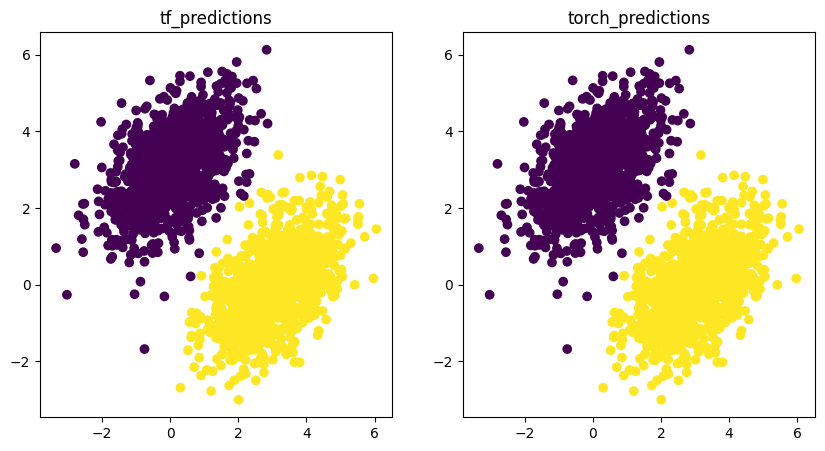

In [28]:
tf_predictions = model_tf(inputs)
torch_predictions = model_torch(torch.Tensor(inputs))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Scatter diagram for tf_predictions
axs[0].scatter(inputs[:, 0], inputs[:, 1], c=tf_predictions[:, 0] > 0.5)
axs[0].set_title('tf_predictions')

# Scatter diagram for torch_predictions
axs[1].scatter(inputs[:, 0], inputs[:, 1], c=torch_predictions[:, 0] > 0.5)
axs[1].set_title('torch_predictions')

plt.show()
# We're happy because they are the same!

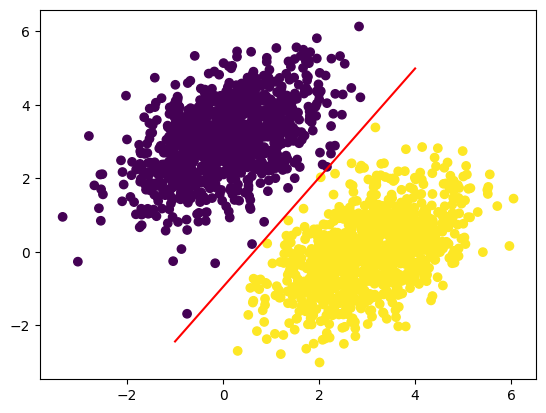

In [29]:
x = np.linspace(-1, 4, 100)
y = - W_tf[0] /  W_tf[1] * x + (0.5 - b_tf) / W_tf[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=tf_predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**Listing 3.22: A `Dense` layer implemented as a `Layer` subclass**

In [30]:
from tensorflow import keras
# So this is how Keras works!
class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        # Equivalent to:
        # self.W = tf.Variable(tf.random.normal(shape=(input_dim, self.units)))
        # or:
        # self.W = tf.Variable(np.random.randn(input_dim, self.units))
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")
        
    # When the layer is actualy called, what runs is:
    # def __call__(self, inputs):
    #    if not self.built:
    #       self.build(inputs.shape)
    #       self.built = True
    #    return self.call(inputs)
    # That's why in keras you don't have to build the model before running!
    # It gets automatically built when the layer gets called for the first
    # time.

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [31]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
utils.tensor_info(input_tensor, "input_tensor", image=False)
output_tensor = my_dense(input_tensor)
utils.tensor_info(output_tensor, "output_tensor", image=False)
# Possible TODO: build a layer explorer in my tensor utils?

==================== input_tensor | tensor_info ====================
Type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: (2, 784) | nDims: 2 | dtype: <dtype: 'float32'>
input_tensor[0]: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

==================== output_tensor | tensor_info ====================
Type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: (2, 32) | nDims: 2 | dtype: <dtype: 'float32'>
output_tensor[0]: [0.         0.54534024 1.6058508  0.         2.1556423  0.
 1.4860432  0.         0.20912041 3.1574087  0.         0.
 1.5413468  0.         0.         0.         0.         0.
 0.         0.2982239 ]



#### Automatic shape inference: Building layers on the fly

In [32]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [33]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [34]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [35]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop", # RMSprop stands for Root Mean Square Propagation
              loss="mean_squared_error", # Formula: mean((y_true - y_pred)^2)
              metrics=["accuracy"]) # Formula: sum(y_true == y_pred) / len(y_true)

In [36]:
# This syntax is useful to pass parameters to the objects.
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])
# RMSprop runs slowly on Apple Silicon. Use tf.keras.optimizerss.legacy.RMSprop instead.

### Picking a loss function

### Understanding the fit() method

**Listing 3.23: Calling `fit()` with NumPy data**

In [37]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 1ms/step - loss: 0.1218 - binary_accuracy: 0.9600
Epoch 2/5
16/16 [==============================] - 0s 571us/step - loss: 0.0995 - binary_accuracy: 0.9650
Epoch 3/5
16/16 [==============================] - 0s 1ms/step - loss: 0.0858 - binary_accuracy: 0.9660
Epoch 4/5
16/16 [==============================] - 0s 947us/step - loss: 0.0759 - binary_accuracy: 0.9670
Epoch 5/5
16/16 [==============================] - 0s 788us/step - loss: 0.0692 - binary_accuracy: 0.9655


In [38]:
history.history

{'loss': [0.1217636838555336,
  0.09953435510396957,
  0.08578559756278992,
  0.07590789347887039,
  0.06918778270483017],
 'binary_accuracy': [0.9599999785423279,
  0.9649999737739563,
  0.9660000205039978,
  0.9670000076293945,
  0.965499997138977]}

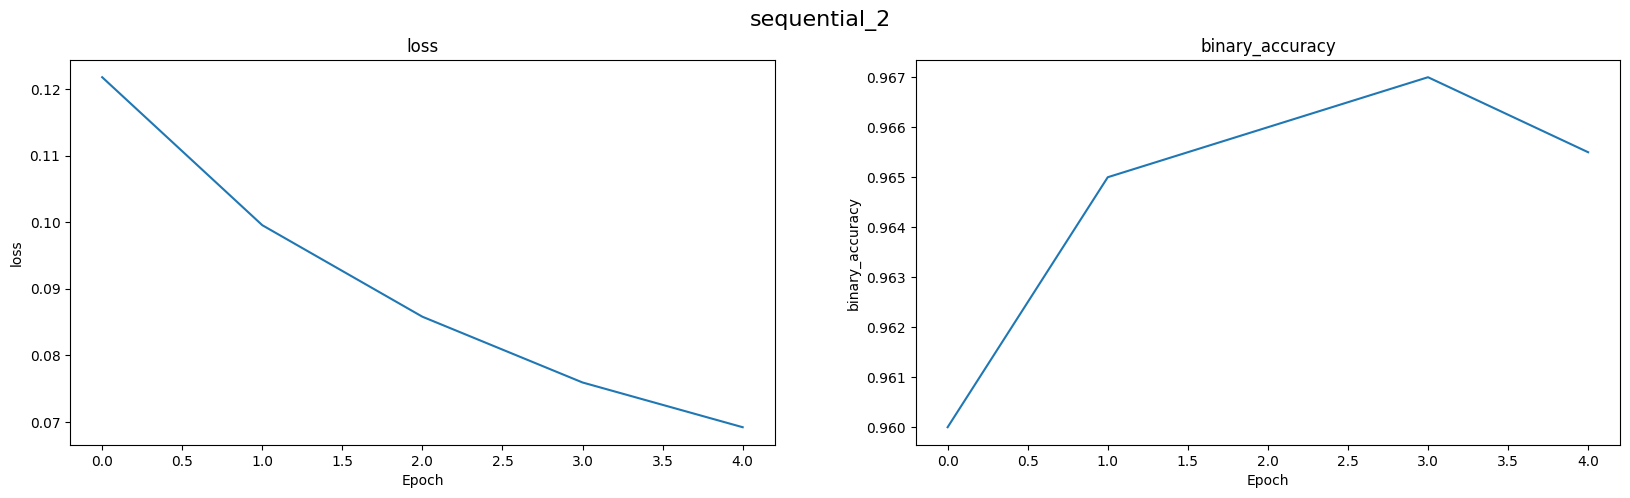

In [47]:
utils.draw_training_history(history)
# TODO: Figure out how to create something like this for PyTorch
# Mi guess is that I have to generate a History object manually during the
# training loop.

### Monitoring loss and metrics on validation data

**Listing 3.24: Using the `validation_data` argument**

In [59]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

utils.tensor_info(val_inputs, "val_inputs manual", image=False)
utils.tensor_info(val_targets, "val_targets manual", image=False)

# Or, using sklearn:
from sklearn.model_selection import train_test_split
training_inputs, val_inputs, training_targets, val_targets = train_test_split(
    inputs, targets, test_size=0.3
)

utils.tensor_info(val_inputs, "val_inputs skl", image=False)
utils.tensor_info(val_targets, "val_targets skl", image=False)


==================== val_inputs manual | tensor_info ====================
Type: <class 'numpy.ndarray'>
Shape: (600, 2) | nDims: 2 | dtype: float32
val_inputs manual[0]: [-0.7666656  2.4069347]

==================== val_targets manual | tensor_info ====================
Type: <class 'numpy.ndarray'>
Shape: (600, 1) | nDims: 2 | dtype: float32
Content: [0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
... (showing only the first 20 elements)

==================== val_inputs skl | tensor_info ====================
Type: <class 'numpy.ndarray'>
Shape: (600, 2) | nDims: 2 | dtype: float32
val_inputs skl[0]: [0.38595665 2.3142967 ]

==================== val_targets skl | tensor_info ====================
Type: <class 'numpy.ndarray'>
Shape: (600, 1) | nDims: 2 | dtype: float32
Content: [0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.]
... (showing only the first 20 elements)



In [60]:
history = model.fit(
    training_inputs,
    training_targets,
    epochs=10,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/10
88/88 [==============================] - 0s 4ms/step - loss: 0.1732 - binary_accuracy: 0.9264 - val_loss: 0.0722 - val_binary_accuracy: 0.9983
Epoch 2/10
88/88 [==============================] - 0s 645us/step - loss: 0.0756 - binary_accuracy: 0.9550 - val_loss: 0.0255 - val_binary_accuracy: 1.0000
Epoch 3/10
88/88 [==============================] - 0s 666us/step - loss: 0.0705 - binary_accuracy: 0.9571 - val_loss: 0.0568 - val_binary_accuracy: 0.9883
Epoch 4/10
88/88 [==============================] - 0s 630us/step - loss: 0.0748 - binary_accuracy: 0.9550 - val_loss: 0.0371 - val_binary_accuracy: 1.0000
Epoch 5/10
88/88 [==============================] - 0s 645us/step - loss: 0.0767 - binary_accuracy: 0.9514 - val_loss: 0.0349 - val_binary_accuracy: 0.9950
Epoch 6/10
88/88 [==============================] - 0s 630us/step - loss: 0.0730 - binary_accuracy: 0.9600 - val_loss: 0.0474 - val_binary_accuracy: 0.9867
Epoch 7/10
88/88 [==============================] - 0s 640us/step 

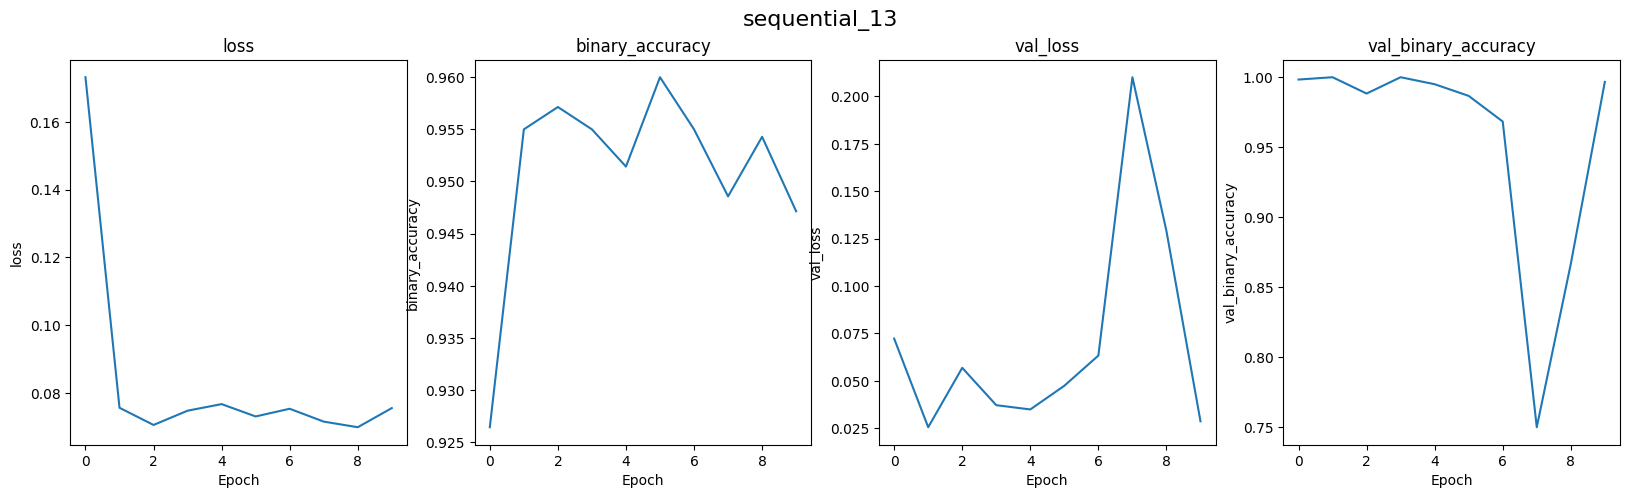

In [61]:
utils.draw_training_history(history)

### Inference: Using a model after training

In [62]:
predictions = model.predict(val_inputs, batch_size=128)
utils.tensor_info(predictions, "predictions", image=False)

5/5 [==============================] - 0s 561us/step
==================== predictions | tensor_info ====================
Type: <class 'numpy.ndarray'>
Shape: (600, 1) | nDims: 2 | dtype: float32
Content: [ 0.16991693  1.0480181   0.07942331 -0.37480873  0.9671308   0.13024157
 -0.147618    0.99578947  1.2782627   1.0559477  -0.37902337  0.86361647
  0.9787705  -0.04783911  0.140625    0.8099596   0.741943    0.8716904
  0.99927175  0.67770064]
... (showing only the first 20 elements)



## Summary